In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
print('Hello')

Hello


## Load GEOS Data

In [3]:
ds_ci = xr.open_dataset('../data/ai_ready/CloudImageryDataset.nc')
ds_co = xr.open_dataset('../data/ai_ready/CloudOpticalDepthDataset.nc')
ds_sw = xr.open_dataset('../data/ai_ready/ReflectedSWDataset.nc')

In [15]:
CID = ds_ci['CloudImagery'][0,...]
COD = ds_co['CloudOpticalDepth'][0,...]
RSW = ds_sw['ReflectedSW'][0,...]

In [17]:
# Make the shapes of CID and COD same
COD = COD[...,:-1].copy()

# Variables for each RGB
CIDR = CID.sel(rgb='red')
CIDG = CID.sel(rgb='green')
CIDB = CID.sel(rgb='blue')

In [18]:
# DataFrame containing all the variables
df = pd.DataFrame({'cod':COD.data.flatten(),
              'cidr': CIDR.data.flatten(),
              'cidg': CIDG.data.flatten(),
              'cidb': CIDB.data.flatten(),
              })
df.dropna(inplace=True)
df = df.loc[~((df.cidr==0)|(df.cidr==0)|(df.cidr==0)) & (df.cod>4) ]

# df
scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df))
df

,0,1,2,3
0,2.647151,0.394539,0.455244,0.535173
1,1.936741,0.392438,0.452593,0.533185
2,1.936741,0.377706,0.439115,0.521243
3,1.372553,0.352363,0.414831,0.497293
4,1.372553,0.352363,0.413618,0.497293
...,...,...,...,...
1214253,-0.694442,-2.633483,-2.654851,-2.510921
1214254,-0.663162,-2.152164,-2.166574,-2.070543
1214255,-0.564296,-1.023541,-1.110111,-1.154440
1214256,-0.469316,-0.363670,-0.496889,-0.610559


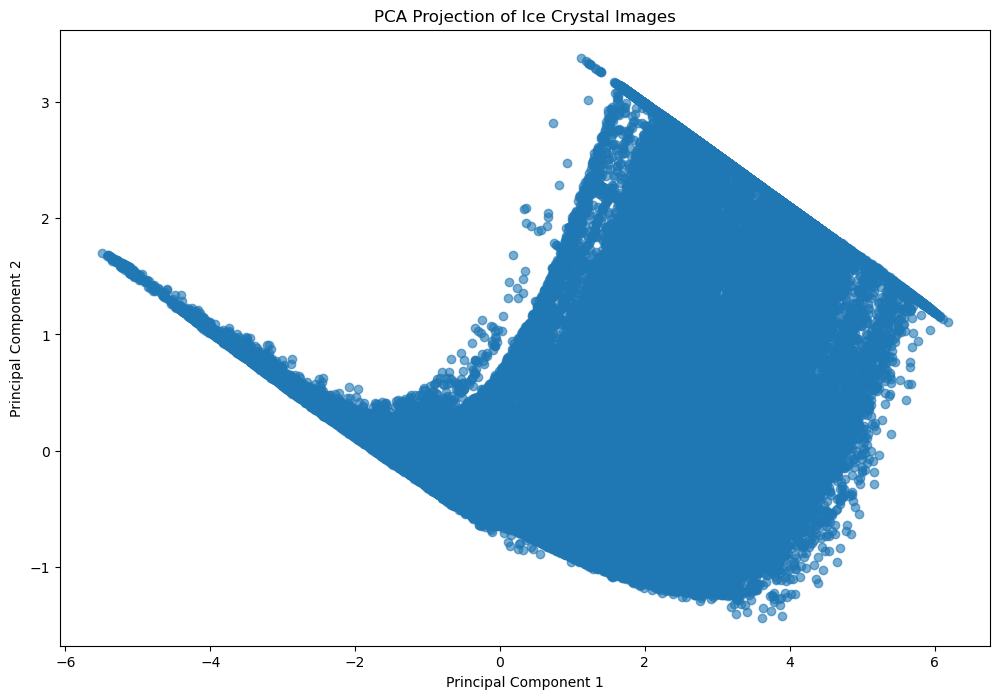

In [19]:
# Perform PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Plot the PCA result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)

# Set habit names as tick labels for the color bar

plt.title('PCA Projection of Ice Crystal Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()